#load dataset

In [1]:
!pip install -q kaggle
from google.colab import files

In [2]:
files.upload()



Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"razimo","key":"df1490ac312aa02d09001d69c3d6db5d"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
! kaggle datasets list

ref                                                                   title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
muratkokludataset/date-fruit-datasets                                 Date Fruit Datasets                              408KB  2022-04-03 09:25:39           9748       1335  0.9375           
victorsoeiro/netflix-tv-shows-and-movies                              Netflix TV Shows and Movies                        2MB  2022-05-15 00:01:23           1890         67  1.0              
mdmahmudulhasansuzan/students-adaptability-level-in-online-education  Students Adaptability Level in Online Education    6KB  2022-04-16 04:46:28           6479        167  1.0              
muratkokludataset/acoustic-extinguisher-fire-

In [5]:
!kaggle datasets download  iabhishekofficial/mobile-price-classification

  0% 0.00/70.6k [00:00<?, ?B/s]
100% 70.6k/70.6k [00:00<00:00, 40.0MB/s]


In [6]:
!unzip /content/mobile-price-classification.zip

Archive:  /content/mobile-price-classification.zip
  inflating: test.csv                
  inflating: train.csv               


#pr

Column's descriptions:¶
battery_power: Total energy a battery can store in one time measured in mAh

blue: Has bluetooth or not

clock_speed: speed at which microprocessor executes instructions

dual_sim: Has dual sim support or not

fc: Front Camera mega pixels

four_g: Has 4G or not

int_memory: Internal Memory in Gigabytes

m_dep: Mobile Depth in cm

mobile_wt: Weight of mobile phone

n_cores: Number of cores of processor

pc: Primary Camera mega pixels

px_height: Pixel Resolution Height

px_width: Pixel Resolution Width

ram: Random Access Memory in Mega Bytes

sc_h: Screen Height of mobile in cm

sc_w: Screen Width of mobile in cm

talk_time: longest time that a single battery charge will last when you are

three_g: Has 3G or not

touch_screen: Has touch screen or not

wifi: Has wifi or not

price_range: This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [8]:
train.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [9]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [10]:
train.price_range.nunique()


4

In [11]:
train.groupby('price_range').count()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
price_range,,,,,,,,,,,,,,,,,,,,
0,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500
1,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500
2,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500
3,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500


In [12]:
#two price classes (low -> 0 & high -> 1)
train.price_range.replace(1, 0, inplace=True)
train.price_range.replace([2, 3], 1, inplace=True)

In [13]:
train.groupby('price_range').count()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
price_range,,,,,,,,,,,,,,,,,,,,
0,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
1,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000


In [14]:
x_train, x_test, y_train, y_test = train_test_split(train.drop(columns=['price_range']), train.price_range, test_size=0.2, random_state=0)


In [15]:
from sklearn.metrics import auc

def forward_selection(X, y):
  features = []
  final_features = {'features': [], 'scores': []}
  rem_features = X.columns
  for i in range(len(X.columns)):
    max_score = 0
    best_feature = ""
    best_score = 0
    for feature in rem_features:
      new_X = X[features + [feature]]
      X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.2, random_state=0)
      logisticRegr = LogisticRegression()
      logisticRegr.fit(X_train, y_train)
      score = logisticRegr.score(X_test, y_test)
      if score > max_score :
        max_score = score
        best_feature = feature
        best_score = score
    rem_features = rem_features.drop(best_feature)
    features.append(best_feature)

    final_features['features'].append(best_feature)
    final_features['scores'].append(best_score)
  final_features['features_rank'] = range(len(X.columns))

  best_index = 0
  mx_feature = 0
  for i in range(len(final_features['scores'])):
    if final_features['scores'][i] > mx_feature:
      mx_feature = final_features['scores'][i] 
      best_index = i

  final_features['best_features'] = final_features['features'][:best_index]
  return final_features

In [16]:
#scaling
standard_scaler = StandardScaler()
x_train[x_train.columns] = standard_scaler.fit_transform(x_train[x_train.columns])

In [17]:
x_test[x_test.columns] = standard_scaler.transform(x_test[x_test.columns])


In [18]:
fs = forward_selection(x_train, y_train)
print(fs)

{'features': ['ram', 'battery_power', 'px_height', 'px_width', 'blue', 'clock_speed', 'mobile_wt', 'fc', 'four_g', 'dual_sim', 'm_dep', 'n_cores', 'pc', 'int_memory', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi'], 'scores': [0.909375, 0.940625, 0.971875, 0.996875, 0.996875, 0.996875, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.996875, 0.99375, 0.99375], 'features_rank': range(0, 20), 'best_features': ['ram', 'battery_power', 'px_height', 'px_width', 'blue', 'clock_speed']}


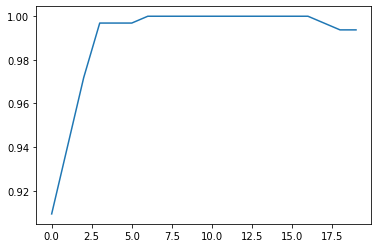

In [19]:
plt.plot(fs['features_rank'], fs['scores'])


In [20]:
print(fs['best_features'])


['ram', 'battery_power', 'px_height', 'px_width', 'blue', 'clock_speed']


In [21]:
logisticReg = LogisticRegression()
logisticReg.fit(x_train[['ram', 'battery_power', 'px_height', 'px_width', 'blue', 'clock_speed']], y_train)
y_pred = logisticReg.predict(x_test[['ram', 'battery_power', 'px_height', 'px_width', 'blue', 'clock_speed']])
print(classification_report(y_pred, logisticReg.predict(x_test[['ram', 'battery_power', 'px_height', 'px_width', 'blue', 'clock_speed']])))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       190
           1       1.00      1.00      1.00       210

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [22]:
pca = PCA(n_components = 5)
pca.fit(x_train)

pca_train = pca.transform(x_train)
pca_test = pca.transform(x_test)

In [23]:
pca_model = LogisticRegression()
pca_model.fit(pca_train, y_train)
print(classification_report(y_test, pca_model.predict(pca_test)))

              precision    recall  f1-score   support

           0       0.57      0.70      0.63       187
           1       0.67      0.54      0.60       213

    accuracy                           0.61       400
   macro avg       0.62      0.62      0.61       400
weighted avg       0.62      0.61      0.61       400



In [24]:
cl = [0, 1, 2, 3]
train['battery_bin'] = pd.cut(train.battery_power, bins = 4, labels = cl)

In [25]:
x_train_bin, x_test_bin, y_train_bin, y_test_bin = train_test_split(train.drop(columns=['price_range']),
                                                                    train.price_range, test_size=0.2, random_state=0)

In [26]:
bin_logisticReg = LogisticRegression()
bin_logisticReg.fit(x_train_bin.drop(columns='battery_power'), y_train_bin)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

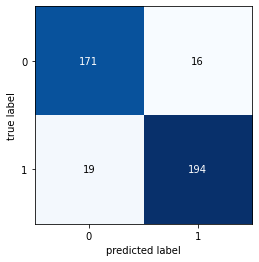

In [27]:
cm = confusion_matrix(y_test_bin, bin_logisticReg.predict(x_test_bin.drop(columns='battery_power')))
fig, ax = plot_confusion_matrix(conf_mat = cm)
plt.show()

In [28]:
pd.cut(x_train_bin.battery_power, bins = 10).value_counts()


(499.503, 650.7]    180
(800.4, 950.1]      175
(650.7, 800.4]      167
(1848.3, 1998.0]    165
(950.1, 1099.8]     158
(1548.9, 1698.6]    157
(1698.6, 1848.3]    153
(1399.2, 1548.9]    151
(1249.5, 1399.2]    148
(1099.8, 1249.5]    146
Name: battery_power, dtype: int64

In [29]:
min(x_train_bin.battery_power)


501

In [30]:
max(x_train_bin.battery_power)

1998

In [31]:
x_train_log, x_test_log, y_train_log, y_test_log = train_test_split(train.drop(columns=['price_range', 'battery_bin', 'fc']), 
                                                                    train.price_range, test_size=0.2, random_state=0)

In [32]:
log_logisticReg = LogisticRegression()
log_logisticReg.fit(x_train_log, y_train_log)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

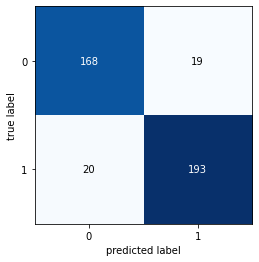

In [33]:
cm = confusion_matrix(y_test_log, log_logisticReg.predict(x_test_log))
fig, ax = plot_confusion_matrix(conf_mat = cm)
plt.show()

In [34]:
train['area'] = train.sc_w * train.sc_h


In [35]:
x_train_area, x_test_area, y_train_area, y_test_area = train_test_split(train.drop(columns=['price_range', 'battery_bin']), train.price_range, test_size=0.2, random_state=0)

In [36]:
area_logisticReg = LogisticRegression()
area_logisticReg.fit(x_train_area, y_train_area)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

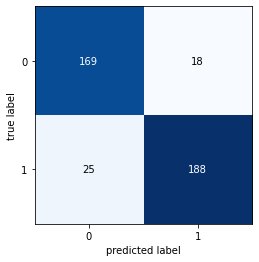

In [37]:
cm = confusion_matrix(y_test_area, area_logisticReg.predict(x_test_area))
fig, ax = plot_confusion_matrix(conf_mat = cm)
plt.show()

In [38]:
categorical_features = []
for feature in train.columns.to_list():
  if ( len(train[feature].unique()) < 3 ):
    categorical_features.append(feature)

categorical_features.remove('price_range')
categorical_features

['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

In [39]:
train = pd.get_dummies(train, columns=categorical_features, prefix=categorical_features)
train.sample(3)

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,...,dual_sim_0,dual_sim_1,four_g_0,four_g_1,three_g_0,three_g_1,touch_screen_0,touch_screen_1,wifi_0,wifi_1
1252,917,0.5,1,31,0.5,88,6,2,423,909,...,1,0,0,1,0,1,0,1,1,0
709,1640,0.7,10,21,0.8,169,7,14,589,1301,...,1,0,0,1,0,1,0,1,1,0
1371,601,1.7,3,6,0.8,169,4,11,818,1827,...,0,1,0,1,0,1,1,0,0,1


In [40]:
x_train_one_hot, x_test_one_hot, y_train_one_hot, y_test_one_hot = train_test_split(
    train.drop(columns=['price_range', 'battery_bin',  'area']), 
    train.price_range, test_size=0.2, random_state=0)

In [41]:
one_hot_logisticReg = LogisticRegression()
one_hot_logisticReg.fit(x_train_one_hot, y_train_one_hot)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

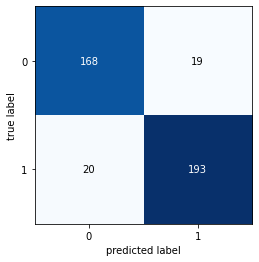

In [42]:
cm = confusion_matrix(y_test_one_hot, one_hot_logisticReg.predict(x_test_one_hot))
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

In [43]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()


In [44]:
dtree.fit(x_train[['ram', 'battery_power', 'px_height', 'px_width', 'blue', 'clock_speed']], y_train)
y_pred = dtree.predict(x_test[['ram', 'battery_power', 'px_height', 'px_width', 'blue', 'clock_speed']])
print(classification_report(y_pred, dtree.predict(x_test[['ram', 'battery_power', 'px_height', 'px_width', 'blue', 'clock_speed']])))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       184
           1       1.00      1.00      1.00       216

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [45]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train[['ram', 'battery_power', 'px_height', 'px_width', 'blue', 'clock_speed']], y_train)
y_pred = gbc.predict(x_test[['ram', 'battery_power', 'px_height', 'px_width', 'blue', 'clock_speed']])
print(classification_report(y_pred, gbc.predict(x_test[['ram', 'battery_power', 'px_height', 'px_width', 'blue', 'clock_speed']])))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       187
           1       1.00      1.00      1.00       213

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

